<a href="https://colab.research.google.com/github/danijel3/CovidPLdata/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [5]:
!wget https://github.com/danijel3/CovidPLdata/raw/main/zgony.csv

--2021-12-11 07:48:57--  https://github.com/danijel3/CovidPLdata/raw/main/zgony.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/danijel3/CovidPLdata/main/zgony.csv [following]
--2021-12-11 07:48:58--  https://raw.githubusercontent.com/danijel3/CovidPLdata/main/zgony.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2819493 (2.7M) [text/plain]
Saving to: ‘zgony.csv’

zgony.csv           100%[===================>]   2.69M  --.-KB/s    in 0.05s   

2021-12-11 07:48:58 (57.0 MB/s) - ‘zgony.csv’ saved [2819493/2819493]



In [8]:
df=pd.read_csv('zgony.csv',delimiter=';')
df

,Data,Płeć,czy_wspolistniejace,w_pelni_zaszczepiony,obnizona_odpornosc,Województwo,Powiat,Wiek2,Liczba zgonów
0,07.12.2021,M,N,N,N,zachodniopomorskie,m. Szczecin,64,1
1,07.12.2021,K,T,N,N,małopolskie,nowotarski,91,1
2,07.12.2021,M,N,N,N,małopolskie,nowosądecki,83,1
3,07.12.2021,K,N,N,N,małopolskie,myślenicki,63,1
4,07.12.2021,K,N,N,N,małopolskie,miechowski,69,1
...,...,...,...,...,...,...,...,...,...
56597,02.01.2021,K,N,N,N,warmińsko-mazurskie,piski,60,1
56598,02.01.2021,K,T,N,N,wielkopolskie,gnieźnieński,95,1
56599,02.01.2021,M,T,N,N,wielkopolskie,gnieźnieński,70,1
56600,02.01.2021,M,N,N,N,śląskie,m. Katowice,69,1


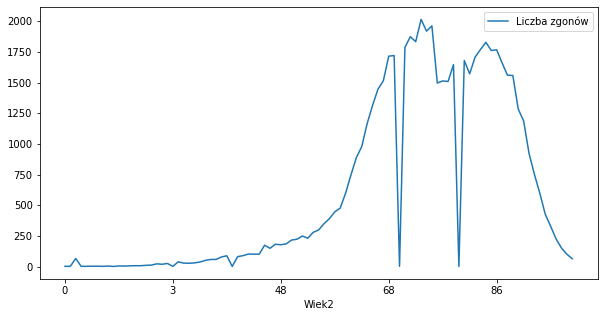

In [14]:
df.groupby(['Wiek2']).agg({'Liczba zgonów':'sum'}).plot(figsize=(10,5))